program start
data loading done
validation accuracy: -8.865211041076169
test accuracy:
-9.633296346234758


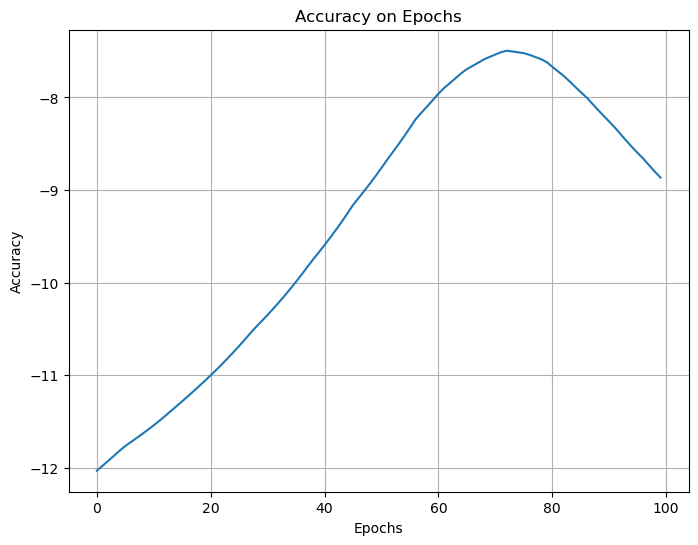

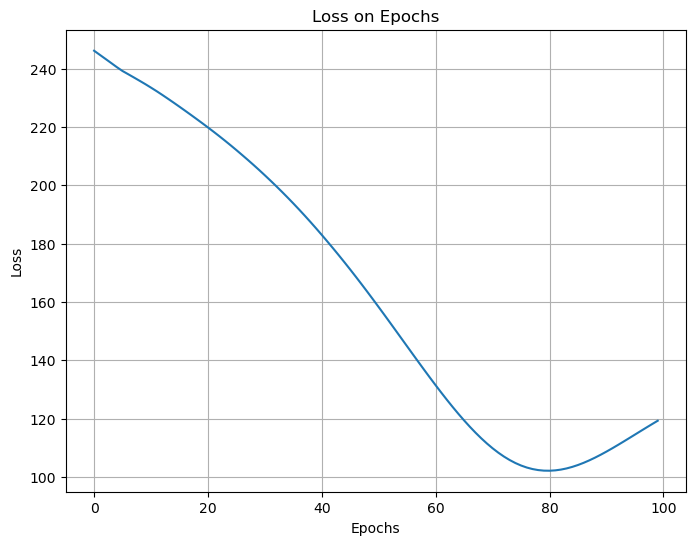

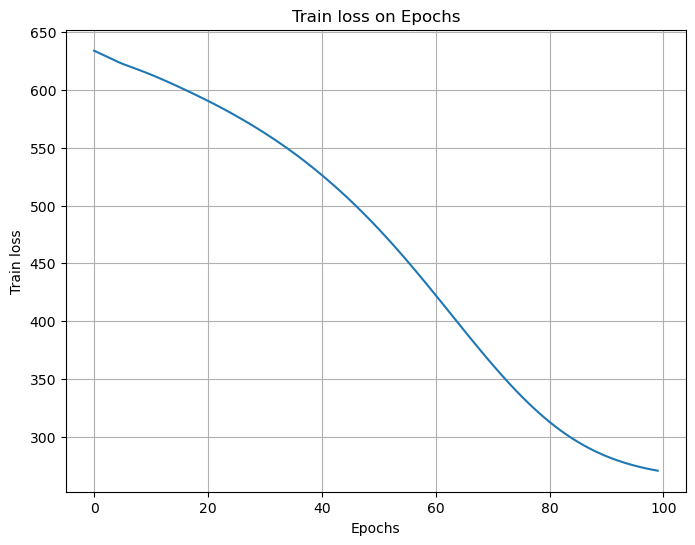

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (64, 48) + inhomogeneous part.

In [17]:
import import_ipynb
import data
import measure
import layer
import model
import hyperparameter_selection as hs
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def classification_model():
    data1 = data.Data()
    data1.get_heart_disease_data()
    
    layers = [
        layer.Layer(13,124,model.relu,model.relu_backward),
        layer.Layer(124,64,model.relu,model.relu_backward),
        layer.Layer(64,1,model.sigmoid,model.sigmoid_derivative, weight_init = "xavier")
    ]
    
    epochs = 2000
    model1 = model.Model(layers, 0.001, epochs, 10)
    model1.train(data1.X_train, data1.y_train, data1.X_val, data1.y_val) #T
    
    # Predict on test data
    y_pred = model1.predict(data1.X_test.T)
    test_accuracy = model1.get_accuracy(y_pred,data1.y_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    # Show graphs
    measure.plot_graph(range(epochs), model1.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model1.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model1.cost_history_train).flatten(), "Train loss")
    
    
def regression_model():
    data1 = data.Data()
    data1.get_age_prediction_data()
    
    layers = [
        layer.Layer(3072,124,model.relu,model.relu_backward),
        layer.Layer(124,64,model.relu,model.relu_backward),
        layer.Layer(64,1,model.linear,model.linear_derivative)
    ]
    
    epochs = 100
    model1 = model.Model(layers, 0.00001, epochs, 10, "r")
    model1.train(data1.X_train, data1.y_train, data1.X_val, data1.y_val) #T
    
    # Predict on test data
    y_pred = model1.predict(data1.X_test.T)
    test_accuracy = model1.get_accuracy(y_pred,data1.y_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    # Show graphs
    measure.plot_graph(range(epochs), model1.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model1.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model1.cost_history_train).flatten(), "Train loss")
    

def measure_all_c():
    data1 = data.Data()
    data1.get_heart_disease_data()
    
    learning_rates = [0.01, 0.001, 0.0001]
    epochs = [500, 1000, 2000]
    batch_sizes = [5, 10, 20]
    dimensions = [(124,64), (96,48), (64,32)]

    measure1 = measure.Measure(data1, "c")
    measure1.measure_lr(learning_rates)
    measure1.measure_epochs(epochs)
    measure1.measure_batch_size(batch_sizes)
    measure1.measure_dimensionality(dimensions)
    measure1.measure_weight_init()
    
    
def measure_all_r():
    data1 = data.Data()
    data1.get_age_prediction_data()
    
    learning_rates = [0.001, 0.0001, 0.00001]
    epochs = [50, 100, 200]
    batch_sizes = [5, 10, 20]
    dimensions = [(124,64), (96,48), (64,32)]

    measure1 = measure.Measure(data1, "r")
    measure1.measure_lr(learning_rates)
    measure1.measure_epochs(epochs)
    measure1.measure_batch_size(batch_sizes)
    measure1.measure_dimensionality(dimensions)
    measure1.measure_weight_init()
    

def select_best_classification_model():
    data1 = data.Data()
    data1.get_heart_disease_data()
    
    # Selection of hyperparameters & dimensions for classification model
    learning_rates = [0.01, 0.001, 0.0001]
    epochs = [500, 1000, 2000]
    batch_sizes = [5, 10, 20]
    dimensions = [(124,64), (96,48), (64,32)]
    
    # Select best hyperparameters
    hs1 = hs.HyperparameterSelection(learning_rates, epochs, batch_sizes, data1)
    best_model, best_accuracy = hs1.select_best()
    hs1.print_best_output(best_model, best_accuracy)

    # Predict on test data
    y_pred = best_model.predict(data1.X_test.T)
    test_accuracy = best_model.get_accuracy(y_pred,data1.y_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    # Show graphs
    measure.plot_graph(range(best_model.epochs), best_model.accuracy_history, "Accuracy")
    measure.plot_graph(range(best_model.epochs), np.array(best_model.cost_history).flatten(), "Loss")
    measure.plot_graph(range(best_model.epochs), np.array(best_model.cost_history_train).flatten(), "Train loss")
    
    # Select best dimensions
    best_model, best_accuracy = hs1.select_best_dimensions(dimensions)
    hs1.print_best_output(best_model, best_accuracy)
    

def select_best_regression_model():
    data1 = data.Data()
    data1.get_age_prediction_data()
    
    # Selection of hyperparameters & dimensions for classification model
    learning_rates = [0.001, 0.0001, 0.00001]
    epochs = [50, 100, 200]
    batch_sizes = [5, 10, 20]
    dimensions = [(124,64), (96,48), (64,32)]
    
    # Select best hyperparameters
    hs1 = hs.HyperparameterSelection(learning_rates, epochs, batch_sizes, data1, "r")
    best_model, best_accuracy = hs1.select_best()
    hs1.print_best_output(best_model, best_accuracy)
#     hs1.plot_comparison()

    # Predict on test data
    y_pred = best_model.predict(data1.X_test.T)
    test_accuracy = best_model.get_accuracy(y_pred,data1.y_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    # Show graphs
    measure.plot_graph(range(best_model.epochs), best_model.accuracy_history, "Accuracy")
    measure.plot_graph(range(best_model.epochs), np.array(best_model.cost_history).flatten(), "Loss")
    measure.plot_graph(range(best_model.epochs), np.array(best_model.cost_history_train).flatten(), "Train loss")
    
    # Select best dimensions
    best_model, best_accuracy = hs1.select_best_dimensions(dimensions)
    hs1.print_best_output(best_model, best_accuracy)
    

if __name__ == '__main__':
    print("program start")
    
    # Example models
#     classification_model()
#     regression_model()

    # Measurements for report
#     measure_all_r()
#     measure_all_c()

    # Hyperparameter selection
#     select_best_classification_model()
#     select_best_regression_model()

    model_images()
    
    print("program end")
    
        
# First full propagation layer -> then calc loss function as input to backward prop -> then backward propagation
# to minimize the error (here at last you will adjust the weights)
# (throuought the forward propagation, the weights remain constant)

# loss - error between predictions and what we expect 
# cross entropy loss, binary cross entropy loss
        
# loss funciton - then differentiate - with multivaried inputs, the derivatives are called gradients

In [16]:
def model_images():
    data1 = data.Data()
    data1.get_age_prediction_data()
    
    layers = [
        layer.Layer(3072,124,model.relu,model.relu_backward),
        layer.Layer(124,64,model.relu,model.relu_backward),
        layer.Layer(64,1,model.linear,model.linear_derivative)
    ]
    
    epochs = 100
    model1 = model.Model(layers, 0.00001, epochs, 10, "r")
    model1.train(data1.X_train, data1.y_train, data1.X_val, data1.y_val) #T
    
    # Predict on test data
    y_pred = model1.predict(data1.X_test.T)
    test_accuracy = model1.get_accuracy(y_pred,data1.y_test.T)
    print("test accuracy:")
    print(test_accuracy)
    
    # Show graphs
    measure.plot_graph(range(epochs), model1.accuracy_history, "Accuracy")
    measure.plot_graph(range(epochs), np.array(model1.cost_history).flatten(), "Loss")
    measure.plot_graph(range(epochs), np.array(model1.cost_history_train).flatten(), "Train loss")
    
    # Visualise hidden features
    layer_0_images = (layers[0].weights + layers[0].bias).T
    layer_1_images = np.dot(layer_0_images, (layers[1].weights + layers[1].bias).T).T
    layer_2_images = np.dot(layer_1_images.T, (layers[2].weights + layers[2].bias).T).T
    
    images_0 = []
    # (64, 48)
    for i in range(64):
        layer_0_images[i] -= layer_0_images[i].min()
        layer_0_images[i] *= 255.0/layer_0_images[i].max()
        layer_0_images[i] = layer_0_images[i].astype(int)
        images_0.append([])
        for j in range(0,3072,64):
            images_0[i].append(np.array(layer_0_images[i][j:j+48]))
            
    
#     plt.imshow(images_0, interpolation='nearest', cmap="gray")
#     plt.show()


#     im = Image.fromarray(np.uint8(plt.gist_earth(images_0)))
    plt.imsave("image_0", images_0, cmap='Greys')
    
#     images_0 = []
#     # (64, 48)
#     for i in range(124):
#         layer_2_images[i] -= layer_2_images[i].min()
#         layer_2_images[i] *= 255.0/layer_2_images[i].max()
#         layer_2_images[i] = layer_2_images[i].astype(int)
#         images_0.append([])
#         for j in range(0,3072,64):
#             images_0[i].append(np.array(layer_2_images[i][j:j+48]))
            
    
#     plt.imshow(images_0, interpolation='nearest', cmap="gray")
#     plt.show()
        